# K-Means Clustering

## Importing the libraries

In [6]:
# 20/12/2023
# IDE: VSC
# Section 26: K-Means Clustering
# Video [237, 246]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values # Annual Income & Spending Score

# y = dataset.iloc[:, -1].values
# y doesn't exist because there is no dependent variable

## Using the elbow method to find the optimal number of clusters

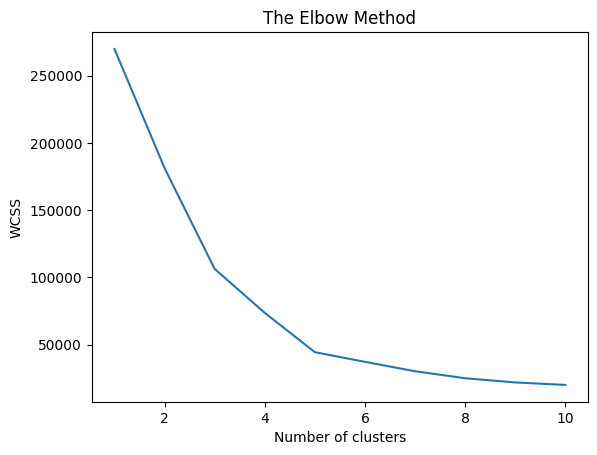

In [8]:
from sklearn.cluster import KMeans

# here we are going to add, one-by-one, the different 
# WCSS values for each of the numbers of the clusters 
# WCSS: Within Cluster Sum of Squares
wcss = []

# we run it with 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# [1, 10]
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

## Training the K-Means model on the dataset

In [12]:
# the graph in 5 decreases very slowly, that's why n_clusters = 5

kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

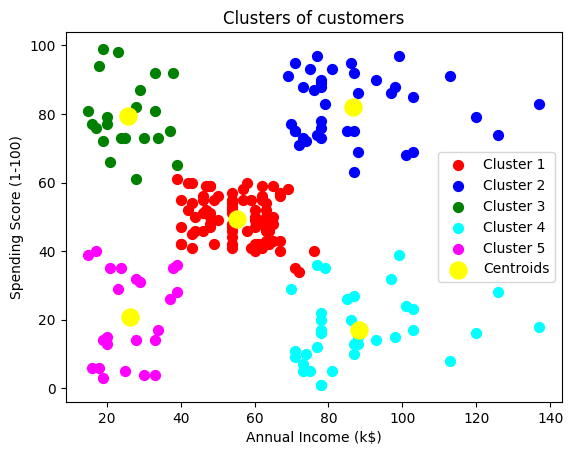

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()